<a href="https://colab.research.google.com/github/rakelup/DESU-IA4PH-Info-PROF/blob/main/Data_visualization_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DESU IA4 HEALTH
#TU : Info-PROF, Introduction to Python programming for health data
Raquel Urena

raquel.urena@univ-amu.fr

##Lesson 3 : Data visualization in Python


Data visualization is the discipline of trying to understand data by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be exposed.


Once we have obtained a clean dataset, the next step is Exploratory Data Analysis (EDA). EDA is the process of figuring out what the data can tell us. We use EDA to find patterns, relationships, or anomalies to inform our subsequent analysis. While there are an almost overwhelming number of methods to use in EDA, one of the most effective starting tools is the data visualization.Indeed, in a data analysis project, a major portion of the value often comes not in the flashy machine learning, but in the straightforward visualization of data.


Python offers various graphing libraries that come packed with lots of different features.
To get a little overview here are the most popular plotting libraries:
1. **Matplotlib**: low level, provides lots of freedom
2. **Pandas Visualization**: easy to use interface, built on Matplotlib. Pandas Visualization allows to create plots out of a pandas dataframe and series. It provides a  higher level API than Matplotlib and so less parameters are necessary to create the plots.
3. **Seaborn**: high-level interface, great default styles;
Seaborn allows to create graphs in a more simple way than matplotlib. Ir provides an easy to use interface for working with pandas dataframes.
4. **Plotly**: can create interactive plots.

In [1]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
import seaborn as sns


### The data set
* **Pregnancies**: Number of times pregnant
* **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure**: Diastolic blood pressure (mm Hg)
* **SkinThickness**: Triceps skin fold thickness (mm)
* **Insulin**: 2-Hour serum insulin (mu U/ml)
* **BMI**: Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction**: Diabetes pedigree function
* **Age**: Age (years)
* **Outcome**: Class variable (0 or 1) O means non diabetic, 1 means diabetic

In [3]:
#Importing the dataframe

#Dataframe placed in the user's drive directory
#from google.colab import drive
#drive.mount('/content/drive/',force_remount=True)
#df = pd.read_csv('diabetes.csv')

#Download dataframe from the internet
df = pd.read_csv("https://raw.githubusercontent.com/rakelup/GDMR/master/diabetes.csv", sep=",",error_bad_lines=False)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Dataframe overview
df.describe()
df.info()
df.isnull().sum()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

In [ ]:
## Missing values :
#There are null values in this dataset that can lead to mistakes in the result. What we are going to do is to replaze the zeo values in certain variables by 
#np.nan and then we will replace this values by the median.

df.Glucose.replace(0, np.nan, inplace=True)
df.Glucose.replace(np.nan, df['Glucose'].median(), inplace=True)
df.BloodPressure.replace(0, np.nan, inplace=True)
df.BloodPressure.replace(np.nan, df['BloodPressure'].median(), inplace=True)
df.SkinThickness.replace(0, np.nan, inplace=True)
df.SkinThickness.replace(np.nan, df['SkinThickness'].median(), inplace=True)
df.Insulin.replace(0, np.nan, inplace=True)
df.Insulin.replace(np.nan, df['Insulin'].median(), inplace=True)
df.BMI.replace(0, np.nan, inplace=True)
df.BMI.replace(np.nan, df['BMI'].median(), inplace=True)

### Scatter plot 

A scatter plot  is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. If the points are coded (color/shape/size), one additional variable can be displayed. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

A scatter plot can suggest various kinds of correlations between variables with a certain confidence interval. For example, weight and height would be on the y-axis, and height would be on the x-axis. Correlations may be positive (rising), negative (falling), or null (uncorrelated). If the dots' pattern from lower left to upper right indicates a positive correlation between the variables being studied. If the pattern of dots slopes from upper left to lower right, it indicates a negative correlation.

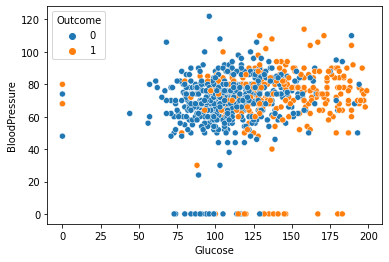

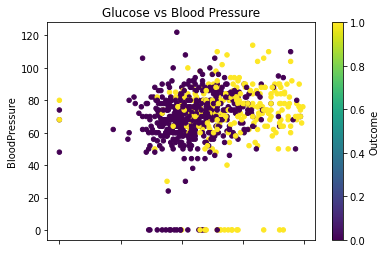

In [12]:
#Relation between the glucose and the bloodpressure
g =sns.scatterplot(x="Glucose", y="BloodPressure",hue="Outcome",  data=df);

df.plot.scatter(x='Glucose', y='BloodPressure', c ="Outcome",colormap='viridis',  title='Glucose vs Blood Pressure')



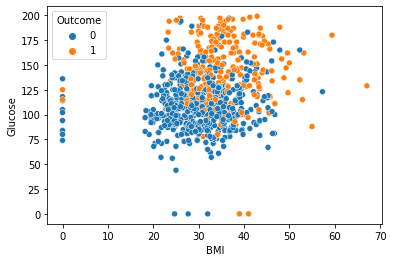

In [6]:
#Relation between the BMI and the Glucose
g =sns.scatterplot(x="BMI", y="Glucose",hue="Outcome", data=df);

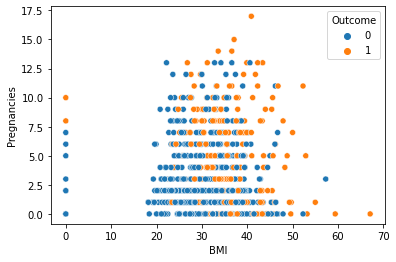

In [7]:
#Relation between the BMI and the nunber of pregnancies
g =sns.scatterplot(x="BMI", y="Pregnancies",hue="Outcome", data=df);

### Line chart

Seaborn and Pandas libraries automatically plots all available numeric columns in a dataframe (at least if we don’t specify a specific column/s).


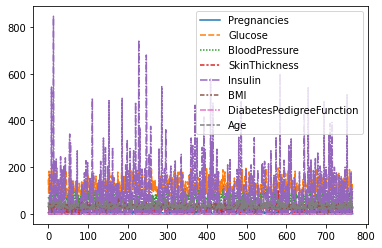

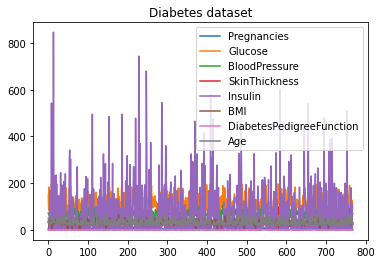

In [17]:
# Plotting all available columns but the Oucome 
#Seaborn
sns.lineplot(data=df.drop(['Outcome'], axis=1))
#Pandas
df.drop(['Outcome'], axis=1).plot.line(title='Diabetes dataset')

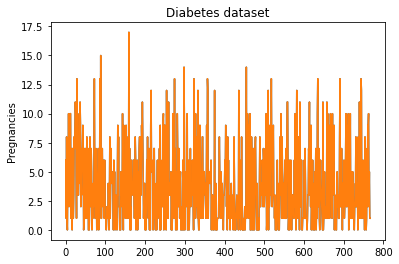

In [18]:
#Plotting one given column
#Seaborn
sns.lineplot(data=df.Pregnancies)

#Pandas
df.Pregnancies.plot.line(title='Diabetes dataset')

###Histogram 

A histogram is an approximate representation of the distribution of numerical data.  To construct a histogram, the first step is to "bin" (or "bucket") the range of values, that is, divide the entire range of values into a series of intervals and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent and are often (but not required to be) of equal size.

Histograms are sometimes confused with bar charts. A histogram is used for continuous data, where the bins represent ranges of data, while a bar chart is a plot of categorical variables.

 Some authors recommend that bar charts have gaps between the rectangles to clarify the distinction

**In Pandas**, we can create a Histogram with the **plot.hist** method. There aren’t any required arguments but we can optionally pass some like the bin size.

**In seaborn**  we use the **sns.distplot** method to create a histogram. We need to pass it the column we want to plot and it will calculate the occurrences itself. We can also pass it the number of bins, and if we want to plot a gaussian kernel density estimate inside the graph.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e3cb873d0>,
      dtype=object)

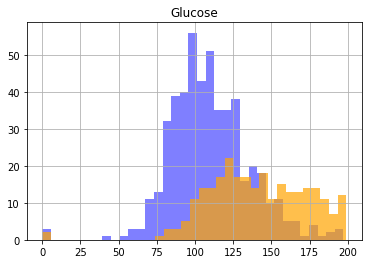

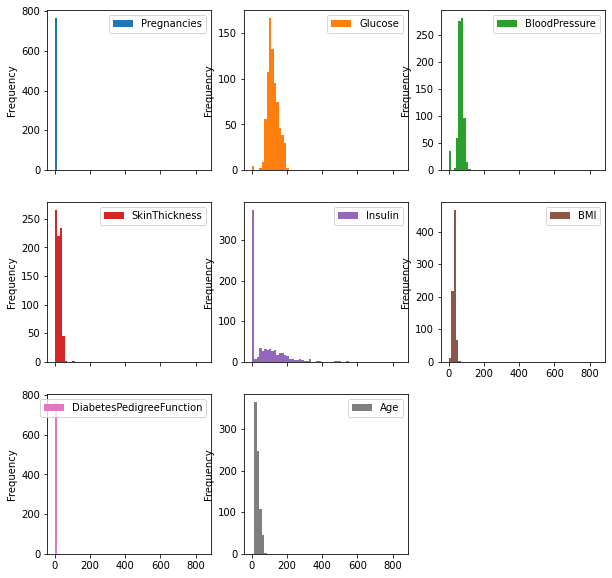

In [24]:
#Histogram in Pandas

#Overlapping histograms depending on the outcome
feature = 'Glucose'
df[df.Outcome==0][feature].hist(bins=35, color='blue', alpha=0.5).set_title(feature)
df[df.Outcome==1][feature].hist(bins=35, color='orange', alpha=0.7)

#Plotting various histograms in the same figure
df.drop(['Outcome'], axis=1).plot.hist(subplots=True, layout=(3,3), figsize=(10, 10), bins=60)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


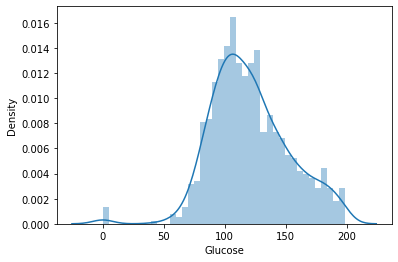

In [28]:
#Histograms in Seaborn 
# We can choose if we plot a gaussian kernel density estimate inside the graph

sns.distplot(df['Glucose'], bins=40, kde=True)




### Pairs Plot 
A pairs plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis

Seaborns pairplot and Pandas scatter_matrix allows to plot a grid of pairwise relationships in a dataset.

The default pairs plot in seaborn only plots numerical columns although we can use the categorical variables for coloring. Creating the default pairs plot is simple: we load in the seaborn library and call the pairplot function, passing it our dataframe.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e2ed83a10>,
      dtype=object)

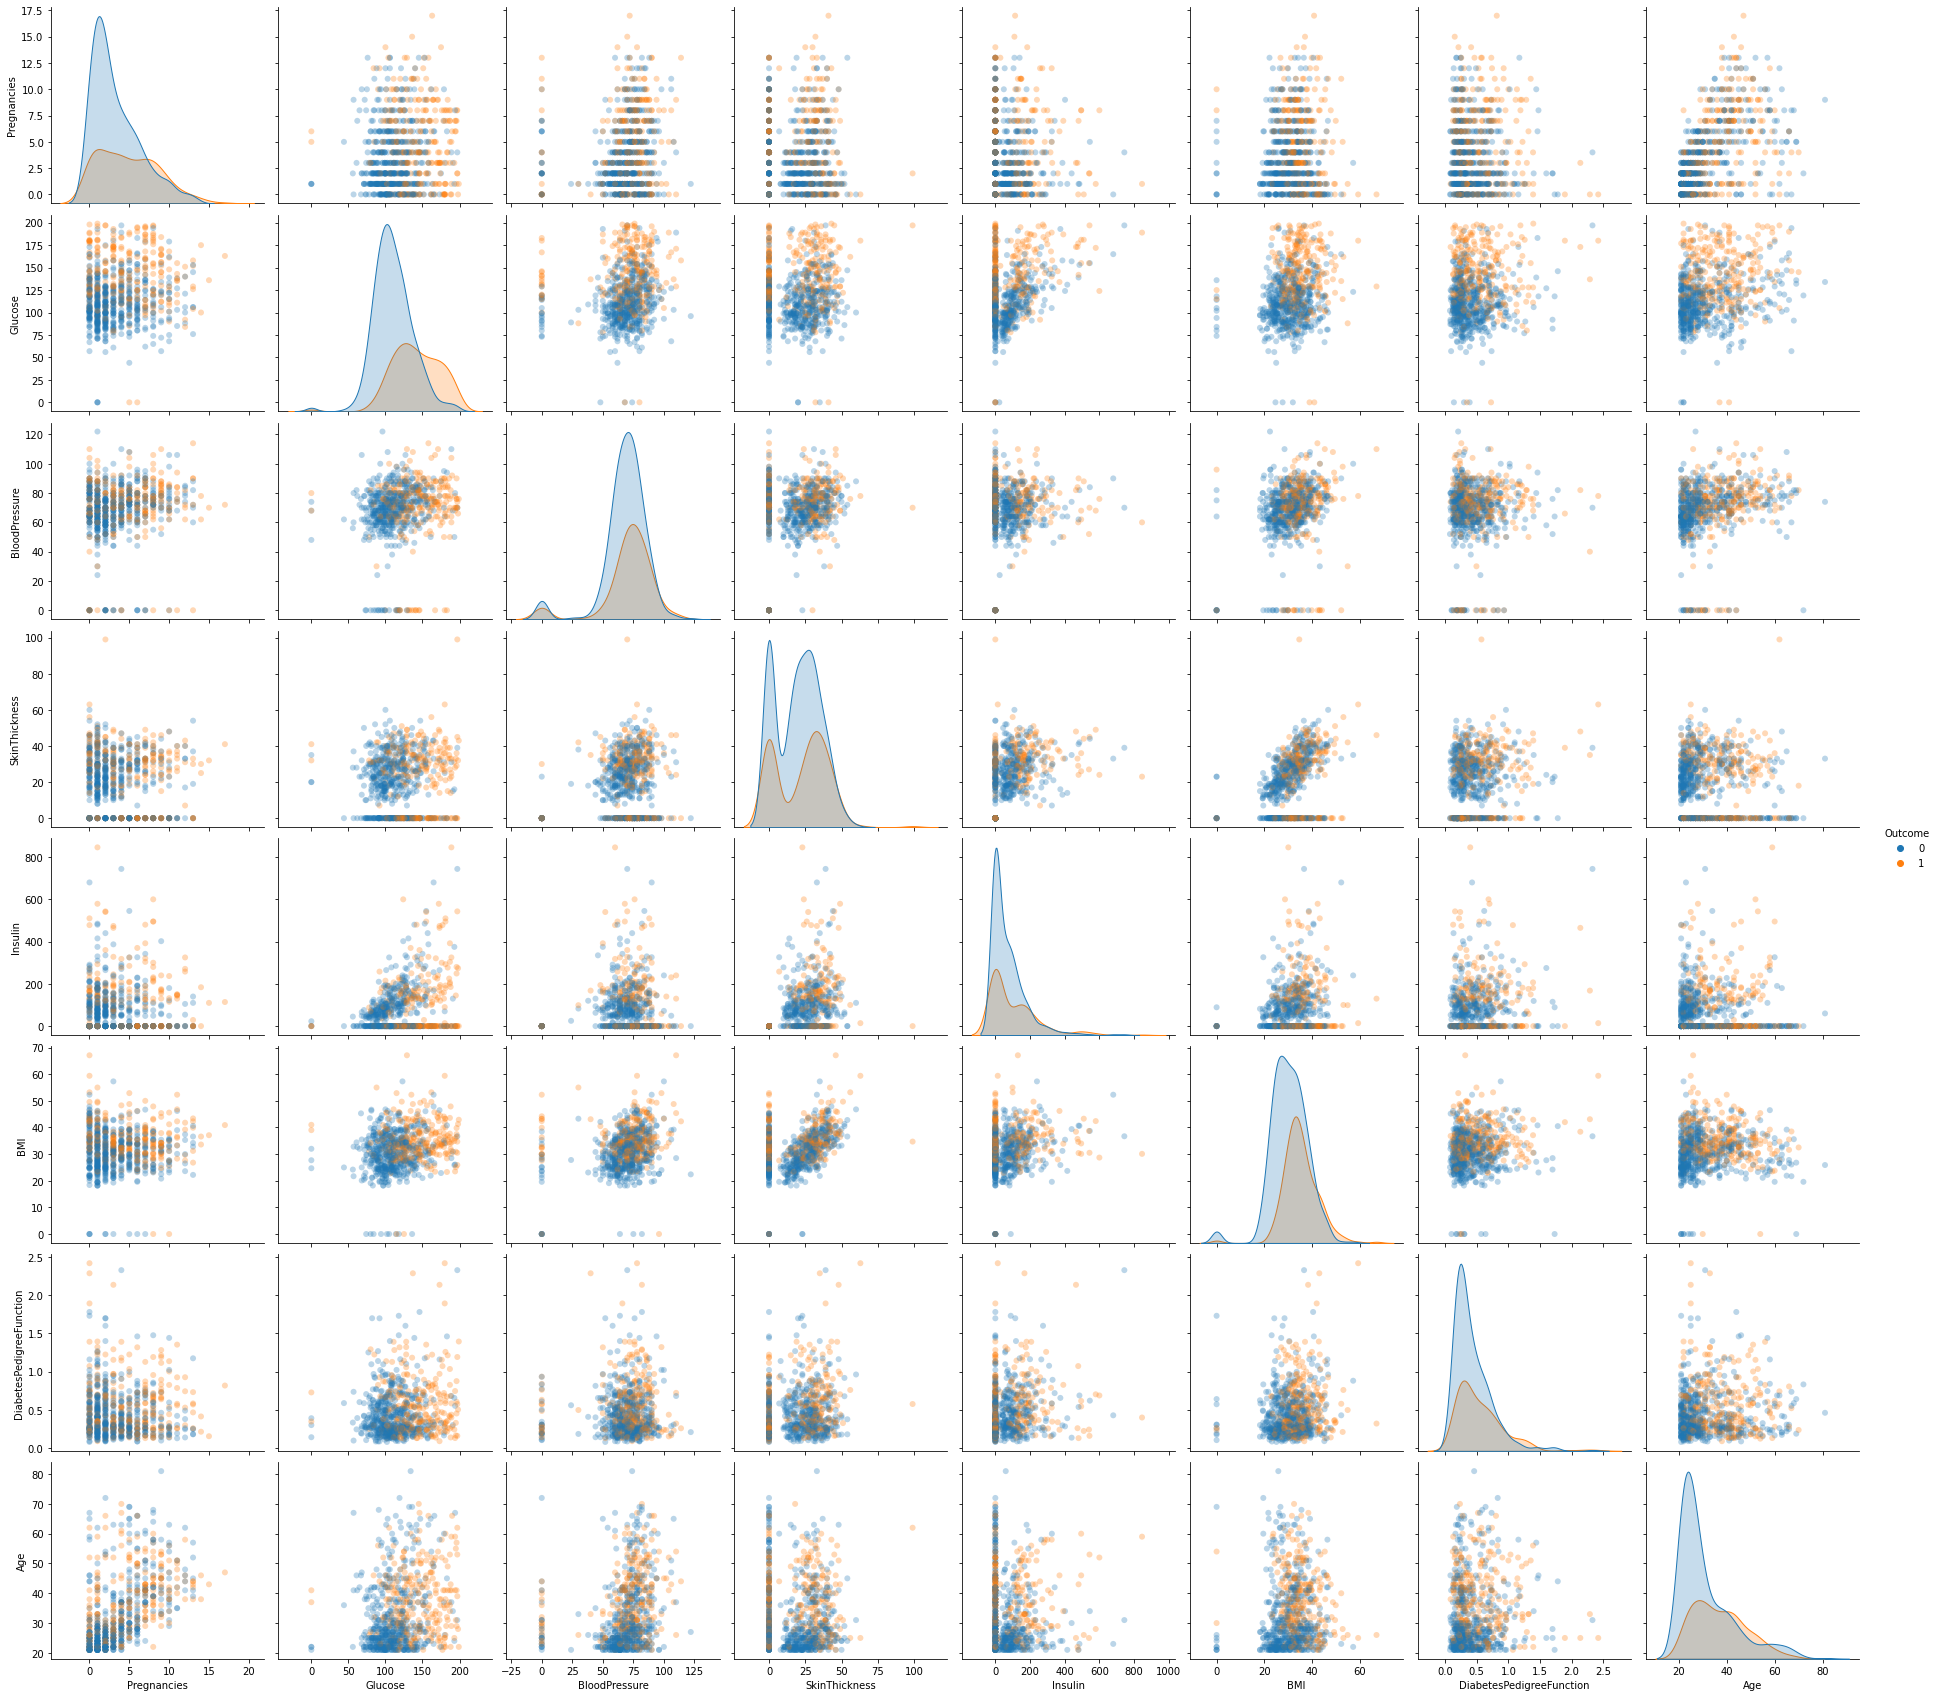

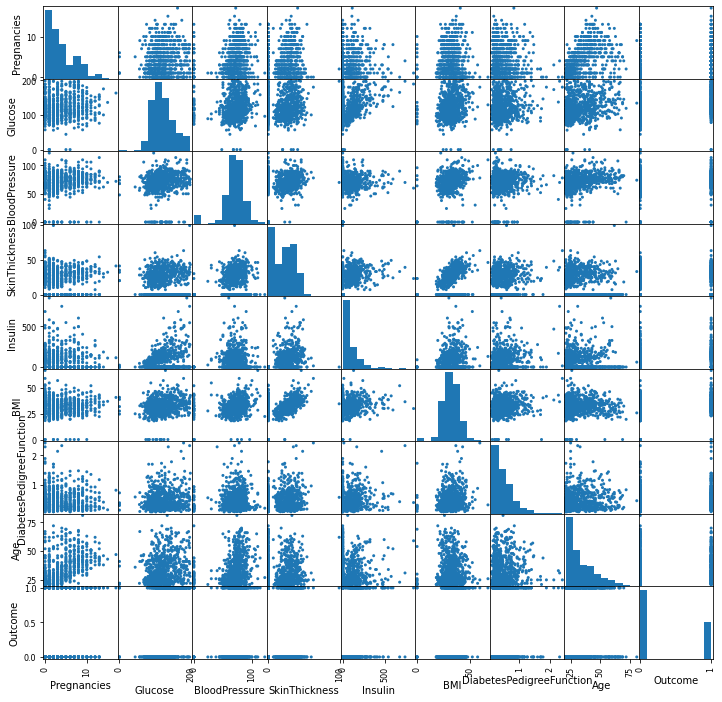

In [27]:
#Seaborn 
sns.pairplot(df, hue='Outcome', plot_kws=dict(alpha=.3, edgecolor='none'), height=3, aspect=1.1)

#Pandas 
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(df, alpha=1, ax=ax)

### Bar chart
A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. 

A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value. Some bar graphs present bars clustered in groups of more than one, showing the values of more than one measured variable.

To plot a bar-chart in Pandas we can use the **plot.bar()** method. For this we will first count the occurrences using the value_count() method and then sort the occurrences from smallest to largest using the sort_index() method.

In Seaborn a bar-chart can be created using the sns.countplot method and passing it the data.

Text(0.5, 1.0, 'Number of pregnancies')

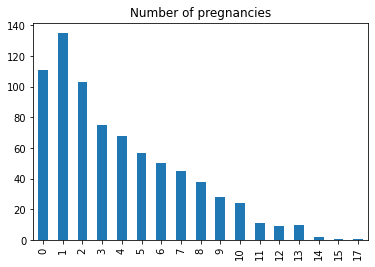

In [35]:
df['Pregnancies'].value_counts().sort_index().plot.bar().set_title('Number of pregnancies')


Text(0.5, 1.0, 'Diabetics and non diabetics')

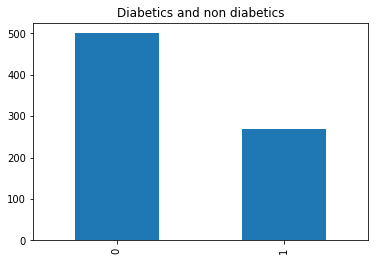

In [33]:
df['Outcome'].value_counts().plot.bar().set_title('Diabetics and non diabetics')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


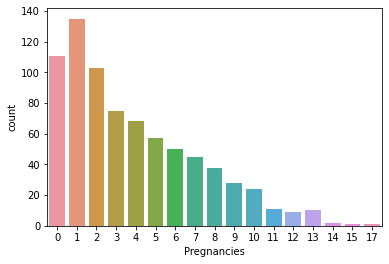

In [36]:
#Bar chart in seaborn 

sns.countplot(df['Pregnancies'])

###Pie Chart


0    0.651042
1    0.348958
Name: Outcome, dtype: float64


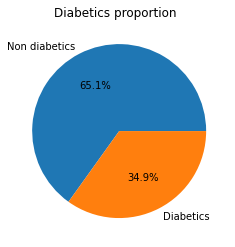

In [37]:
proportion = df['Outcome'].value_counts() / df.Outcome.count()
print (proportion)

label = ['Non diabetics', 'Diabetics ']

plt.pie(proportion,labels = label,autopct='%1.1f%%')

plt.title('Diabetics proportion  ')
labels=['non diabetes, diabetes']
plt.show()


###Heatmap 

A Heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. Heatmaps are perfect for exploring the correlation of features in a dataset.
To get the correlation of the features inside a dataset we can call <dataset>.corr(), which is a Pandas dataframe method. 

Now we ca use Seaborn to create the heatmap

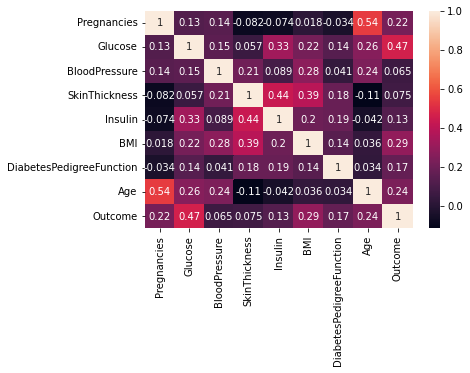

In [38]:
sns.heatmap(df.corr(), annot=True)

###Box plot

A Box Plot is a graphical method of displaying the five-number summary: 
1. the sample minimum (smallest observation)
2. the lower quartile or first quartile
3. the median (the middle value)
4. the upper quartile or third quartile
5. the sample maximum (largest observation)

 We can create box plots using seaborns **sns.boxplot** method and passing it the dataframe as well as the x and y column name.  The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


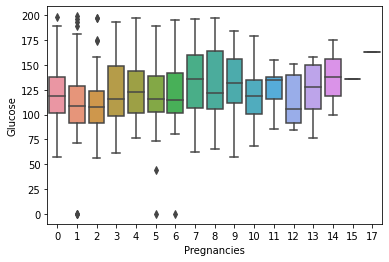

In [39]:
sns.boxplot('Pregnancies', 'Glucose', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


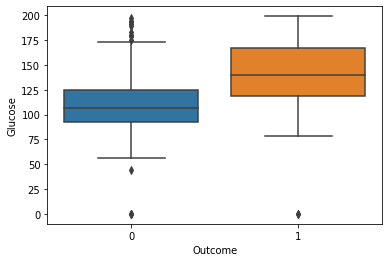

In [40]:
sns.boxplot('Outcome', 'Glucose', data=df)